In [1]:
import math
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = ["SimSun"]
plt.rcParams['axes.unicode_minus'] = False
import numpy as np

missile_starts = [
    np.array([20000, 0, 2000]),
    np.array([19000, 600, 2100]),
    np.array([18000, -600, 1900])
]

drone_pos = {
    0: np.array([17800,0,1800]),
    1: np.array([12000,1400,1400]),
    2: np.array([6000,-3000,700]),
    3: np.array([11000,2000,1800]),
    4: np.array([13000,-2000,1300])
}

In [ ]:
from calc_cover_time import *
from scipy.optimize import dual_annealing
from tqdm.notebook import tqdm

# 假设 drone_pos 是你的无人机位置字典，M1 是导弹初始点
missile_trajs = [get_missile_traj(missile_starts[i], fake_target, v_M1, t_list) for i in range(3)]


for idx in range(5):
    f_pos = drone_pos[idx]
    cover_time_hist = []

    def sa_objective(x):
        try:
            speed = x[0]
            direction_angle = x[1]
            throw_times = x[2:5]
            burst_delays = x[5:8]
            smoke_centers = get_smoke_center_multi(f_pos, direction_angle, speed, throw_times, burst_delays, t_list)
            cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[0], true_target, smoke_R, t_list)
            cover_time_hist.append(cover_time)
            return -cover_time
        except Exception:
            return 1e6

    bounds = [
        (70, 140),           # speed
        ((0, 2*np.pi)),        # angle
        (0, 20), (1, 30), (2, 50),   # throw_times
        (0, 20), (1, 20), (2, 20),   # burst_delays
    ]
    max_iter = 6000
    pbar = tqdm(total=max_iter, desc=f"无人机{idx+1}退火优化进度")

    def progress_callback(x, f, context):
        pbar.update(1)

    result = dual_annealing(sa_objective,
                            bounds, 
                            maxiter=max_iter, 
                            seed=42,
                            callback=progress_callback,
                            initial_temp=20000,
                           )
    print(f"无人机{idx+1}最优参数:", result.x)
    smoke_centers = get_smoke_center_multi(f_pos, result.x[1], result.x[0], result.x[2:5], result.x[5:8], t_list)
    cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[0], true_target, smoke_R, t_list, debug=True)
    pbar.close()

无人机1退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机1最优参数: [139.99656527   3.13899936   2.07213241   4.83095872   6.19326852
   4.84463745   5.79207848   6.16484225]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 3.70s下面是各区间：    区间: 6.92s ~ 10.62s
第2个烟雾球遮挡时间: 1.73s下面是各区间：    区间: 10.62s ~ 12.35s
第3个烟雾球遮挡时间: 0.81s下面是各区间：    区间: 12.36s ~ 13.16s

总遮挡区间：
    6.92s ~ 10.62s
    10.62s ~ 12.35s
    12.36s ~ 13.16s
总遮挡时间: 6.24s


无人机2退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机2最优参数: [129.64012875   4.55977233   4.182089    24.04985378  44.52492513
   6.40607977   4.87409011  16.55807789]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 4.68s下面是各区间：    区间: 14.28s ~ 18.96s
第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    14.28s ~ 18.96s
总遮挡时间: 4.68s


无人机3退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机3最优参数: [136.10423986   1.85487349   8.20822146  17.79368766  35.07498839
   8.93171863   6.05155103   3.72884019]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 5.54s下面是各区间：    区间: 23.86s ~ 29.40s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    23.86s ~ 29.40s
总遮挡时间: 5.54s


无人机4退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机4最优参数: [111.81651118   4.3610336    1.69195048   6.1067628   32.60299085
  11.40139012  12.47033729  18.23988351]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 4.57s下面是各区间：    区间: 18.81s ~ 23.38s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    18.81s ~ 23.38s
总遮挡时间: 4.57s


无人机5退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机5最优参数: [120.61864159   2.1767804    8.89409822  15.22072115  46.68895047
  14.7778023    5.20895291   8.55883093]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 4.10s下面是各区间：    区间: 20.44s ~ 24.54s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    20.44s ~ 24.54s
总遮挡时间: 4.10s


In [ ]:
from calc_cover_time import *
from scipy.optimize import dual_annealing
from tqdm.notebook import tqdm

# 假设 drone_pos 是你的无人机位置字典，M1 是导弹初始点
missile_trajs = [get_missile_traj(missile_starts[i], fake_target, v_M1, t_list) for i in range(3)]


for idx in range(5):
    f_pos = drone_pos[idx]
    cover_time_hist = []

    def sa_objective(x):
        try:
            speed = x[0]
            direction_angle = x[1]
            throw_times = x[2:5]
            burst_delays = x[5:8]
            smoke_centers = get_smoke_center_multi(f_pos, direction_angle, speed, throw_times, burst_delays, t_list)
            cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[1], true_target, smoke_R, t_list)
            cover_time_hist.append(cover_time)
            return -cover_time
        except Exception:
            return 1e6

    bounds = [
        (70, 140),           # speed
        ((0, 2*np.pi)),        # angle
        (0, 20), (1, 30), (2, 50),   # throw_times
        (0, 20), (1, 20), (2, 20),   # burst_delays
    ]
    max_iter = 6000
    pbar = tqdm(total=max_iter, desc=f"无人机{idx+1}退火优化进度")

    def progress_callback(x, f, context):
        pbar.update(1)

    result = dual_annealing(sa_objective,
                            bounds, 
                            maxiter=max_iter, 
                            seed=42,
                            callback=progress_callback,
                            initial_temp=20000,
                           )
    print(f"无人机{idx+1}最优参数:", result.x)
    smoke_centers = get_smoke_center_multi(f_pos, result.x[1], result.x[0], result.x[2:5], result.x[5:8], t_list)
    cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[1], true_target, smoke_R, t_list, debug=True)
    pbar.close()

无人机1退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机1最优参数: [99.986197    2.021499   16.35107039 18.80047616 22.87107773 16.50207341
  1.48577163 17.3595593 ]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
总遮挡时间: 0.00s


无人机2退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机2最优参数: [107.97070753   4.66575043   5.24645531   6.63062286  26.1953878
   3.81279653   2.76225579  15.05254636]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 4.79s下面是各区间：    区间: 9.06s ~ 13.84s
第2个烟雾球遮挡时间: 3.30s下面是各区间：    区间: 20.35s ~ 23.64s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    9.06s ~ 13.84s
    20.35s ~ 23.64s
总遮挡时间: 8.09s


无人机3退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机3最优参数: [114.30417314   1.76524646  10.01240143  24.58533915  45.58454033
   5.95730895   4.46325624   3.16988935]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 4.41s下面是各区间：    区间: 29.27s ~ 33.68s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    29.27s ~ 33.68s
总遮挡时间: 4.41s


无人机4退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机4最优参数: [137.82597691   4.05832668   2.86630832  14.07273215  29.39572167
  12.06809365  10.64461117  11.83191772]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 4.75s下面是各区间：    区间: 14.95s ~ 19.70s
第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    14.95s ~ 19.70s
总遮挡时间: 4.75s


无人机5退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机5最优参数: [99.986197    2.021499   16.35107039 18.80047616 22.87107773 16.50207341
  1.48577163 17.3595593 ]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
总遮挡时间: 0.00s


In [4]:
from calc_cover_time import *
from scipy.optimize import dual_annealing
from tqdm.notebook import tqdm

# 假设 drone_pos 是你的无人机位置字典，M1 是导弹初始点
missile_trajs = [get_missile_traj(missile_starts[i], fake_target, v_M1, t_list) for i in range(3)]


for idx in range(5):
    f_pos = drone_pos[idx]
    cover_time_hist = []

    def sa_objective(x):
        try:
            speed = x[0]
            direction_angle = x[1]
            throw_times = x[2:5]
            burst_delays = x[5:8]
            smoke_centers = get_smoke_center_multi(f_pos, direction_angle, speed, throw_times, burst_delays, t_list)
            cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[2], true_target, smoke_R, t_list)
            cover_time_hist.append(cover_time)
            return -cover_time
        except Exception:
            return 1e6

    bounds = [
        (70, 140),           # speed
        ((0, 2*np.pi)),        # angle
        (0, 20), (1, 30), (2, 50),   # throw_times
        (0, 20), (1, 20), (2, 20),   # burst_delays
    ]
    max_iter = 6000
    pbar = tqdm(total=max_iter, desc=f"无人机{idx+1}退火优化进度")

    def progress_callback(x, f, context):
        pbar.update(1)

    result = dual_annealing(sa_objective,
                            bounds, 
                            maxiter=max_iter, 
                            seed=42,
                            callback=progress_callback,
                            initial_temp=20000,
                           )
    print(f"无人机{idx+1}最优参数:", result.x)
    smoke_centers = get_smoke_center_multi(f_pos, result.x[1], result.x[0], result.x[2:5], result.x[5:8], t_list)
    cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[2], true_target, smoke_R, t_list, debug=True)
    pbar.close()

无人机1退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机1最优参数: [99.986197    2.021499   16.35107039 18.80047616 22.87107773 16.50207341
  1.48577163 17.3595593 ]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
总遮挡时间: 0.00s


无人机2退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机2最优参数: [121.236549     4.50001855   9.07599168  12.87371196  39.60772554
   5.83208772   4.91093736  18.54474222]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 3.98s下面是各区间：    区间: 14.92s ~ 18.89s
第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    14.92s ~ 18.89s
总遮挡时间: 3.98s


无人机3退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机3最优参数: [137.91483222   2.10591455  12.27188406  18.02757665  37.31181133
   1.34304993   7.02258893  19.48334713]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 5.07s下面是各区间：    区间: 25.06s ~ 30.13s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    25.06s ~ 30.13s
总遮挡时间: 5.07s


无人机4退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [1]:
from calc_cover_time import *
from scipy.optimize import dual_annealing
bounds = [
    [(130,140),  (np.pi/2,np.pi*3/2),  (0,13.87), (1,13.87), (2, 13.87),     (0,18.97),(0,18.97),(0,18.97),    ],#第一架飞机的参数限制
    [(70,140),   (np.pi, np.pi*2),     (0, 50),   (1,50),    (2,50),         (0,16.74),(0, 16.74),(0, 16.74),  ],  #第二架飞机的参数限制
    [(70,140),   (0,np.pi),            (0,60),    (1,60),    (2,60),         (0, 11.9),(0, 11.9),(0, 11.9),    ],#第三架飞机的参数限制
    [(70,140),   (np.pi, np.pi*2),     (0, 56),   (0, 56),   (0, 56),        (0, 18.97),(0, 18.97),(0, 18.97), ],   #第四架飞机的参数限制
    [(70,140),   (0, np.pi),           (0, 43.7), (1, 43.7), (2, 43.7),      (0,16.12),(0,16.12),(0,16.12),    ],#第五架飞机的参数限制
]
cover_time_hist = []
idx = 0
missile_trajs = [get_missile_traj(missile_starts[i], fake_target, v_M1, t_list) for i in range(3)]
# 优化目标函数
def sa_objective_multi(x):
    try:
        speed = x[0]
        direction_angle = x[1]
        throw_times = x[2:5]
        burst_delays = x[5:8]
        smoke_centers = get_smoke_center_multi(drone_pos[idx], direction_angle, speed, throw_times, burst_delays, t_list)
        cover_time = get_missile_cover_time_multi_bomb_and_missile(smoke_centers, missile_trajs, true_target, smoke_R, t_list)
        cover_time_hist.append(cover_time)
        return -cover_time
    except AssertionError:
        return 1e6  # 参数非法时返回极小值

# 参数边界：[速度, 角度, 投弹1, 投弹2, 投弹3, 爆炸1, 爆炸2, 爆炸3]
bounds = bounds[idx]

max_iter = 6000


result = dual_annealing(
    sa_objective_multi,
    bounds,
    maxiter=max_iter,
    seed=42,
    initial_temp=20000,
)
print(f"以下为第{idx+1}架无人机的结果")
print("最优参数:", result.x)
print("最大遮挡总时间:", -result.fun)


# 调试get_missile_cover_time_multi_bomb_and_missile
smoke_centers01 = get_smoke_center_multi(drone_pos[idx], result.x[1], result.x[0], result.x[2:5], result.x[5:8], t_list)
get_missile_cover_time_multi_bomb_and_missile(smoke_centers01, missile_trajs, true_target, smoke_R, t_list, debug=True)
plt.figure(figsize=(20, 5))

以下为第1架无人机的结果
最优参数: [133.25244244   3.13470181   0.33970571   3.32824156   5.29023619
   3.87057783   5.0748367    5.77159939]
最大遮挡总时间: 7.316
导弹1遮蔽情况：
  第1个烟雾球遮蔽时间: 3.46s 区间：    4.95s ~ 8.40s
  第2个烟雾球遮蔽时间: 2.72s 区间：    8.40s ~ 11.12s
  第3个烟雾球遮蔽时间: 1.20s 区间：    11.06s ~ 12.26s
导弹1总遮蔽区间：
    4.95s ~ 12.26s
导弹1总遮蔽时间: 7.32s
导弹2遮蔽情况：
  第1个烟雾球遮蔽时间: 0.00s 区间：  第2个烟雾球遮蔽时间: 0.00s 区间：  第3个烟雾球遮蔽时间: 0.00s 区间：导弹2总遮蔽区间：
导弹2总遮蔽时间: 0.00s
导弹3遮蔽情况：
  第1个烟雾球遮蔽时间: 0.00s 区间：  第2个烟雾球遮蔽时间: 0.00s 区间：  第3个烟雾球遮蔽时间: 0.00s 区间：导弹3总遮蔽区间：
导弹3总遮蔽时间: 0.00s
所有导弹被遮蔽时间总和: 7.32s


<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

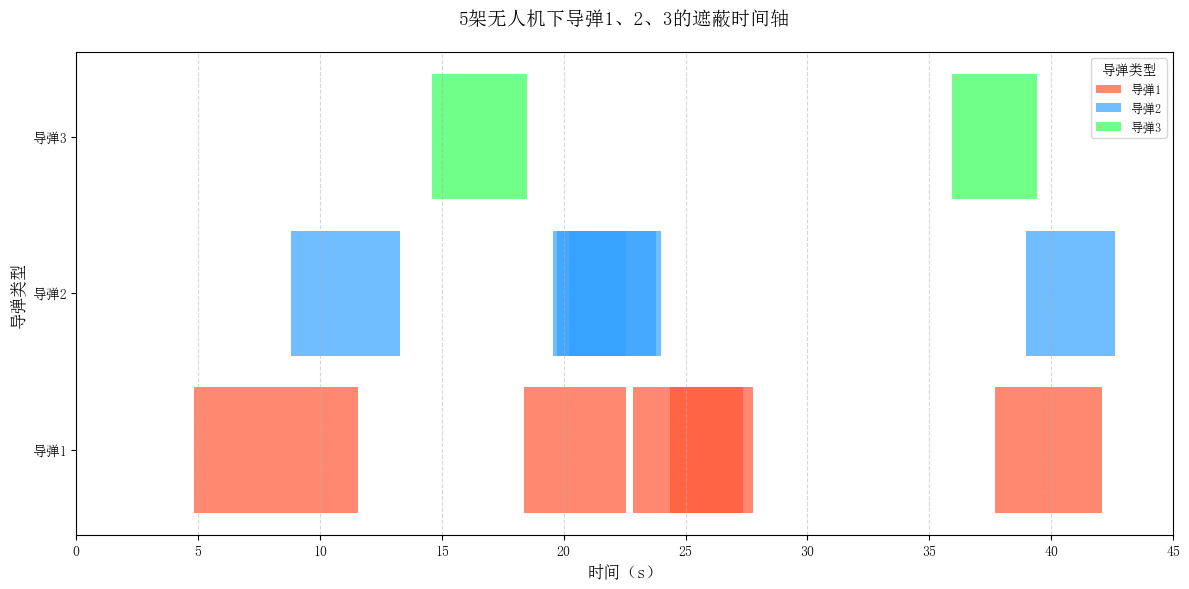

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 整理导弹遮蔽数据（格式：{“导弹X”: {“无人机Y”: [[起始时间, 结束时间], ...]}, ...}）
shield_data = {
    "导弹1": {
        "U1": [[4.83, 11.57]],
        "U2": [[18.38, 22.54]],
        "U3": [[37.71, 42.10]],
        "U4": [[22.84, 27.36]],
        "U5": [[24.35, 27.75]]
    },
    "导弹2": {
        "U1": [],
        "U2": [[8.81, 13.30], [19.71, 22.54]],
        "U3": [[38.96, 42.60]],
        "U4": [[19.55, 23.98]],
        "U5": [[20.22, 23.80]]
    },
    "导弹3": {
        "U1": [],
        "U2": [],
        "U3": [[35.95, 39.41]],
        "U4": [],
        "U5": [[14.59, 18.51]]
    }
}

# 2. 配置视觉样式（颜色、字体）
missile_colors = {
    "导弹1": "#FF5733",  # 红色
    "导弹2": "#33A1FF",  # 蓝色
    "导弹3": "#33FF57"   # 绿色
}
plt.rcParams["font.sans-serif"] = ["SimHei", "WenQuanYi Micro Hei"]  # 中文适配
plt.rcParams["axes.unicode_minus"] = False  # 负号显示适配

# 3. 创建图表与轴对象
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("5架无人机下导弹1、2、3的遮蔽时间轴", fontsize=14, pad=20)
ax.set_xlabel("时间（s）", fontsize=12)
ax.set_ylabel("导弹类型", fontsize=12)

# 4. 定义纵轴分组
missile_types = ["导弹1", "导弹2", "导弹3"]
y_pos = np.arange(len(missile_types))  # 每个导弹类型的y坐标

# 5. 绘制遮蔽区间（横向条形图）
legend_created = {missile: False for missile in missile_types}
for m_idx, missile in enumerate(missile_types):
    color = missile_colors[missile]
    for drone, intervals in shield_data[missile].items():
        for start, end in intervals:
            duration = end - start
            # 绘制横向条形：同导弹类型共享y坐标，通过颜色和横向位置区分
            ax.barh(
                y_pos[m_idx], 
                duration, 
                left=start, 
                color=color, 
                alpha=0.7,  # 透明度提升重叠可见性
                label=missile if not legend_created[missile] else ""
            )
            legend_created[missile] = True

# 6. 调整轴与图例
ax.set_yticks(y_pos)
ax.set_yticklabels(missile_types, fontsize=10)
ax.set_xlim(0, 45)  # 手动适配时间范围
ax.grid(axis="x", linestyle="--", alpha=0.5)  # x轴网格辅助读时间
ax.legend(title="导弹类型", loc="upper right", fontsize=9)

# 7. 调整布局并显示
plt.tight_layout()
plt.show()
# plt.savefig("导弹遮蔽时间轴.png", dpi=300)  # 可选：保存高清图片

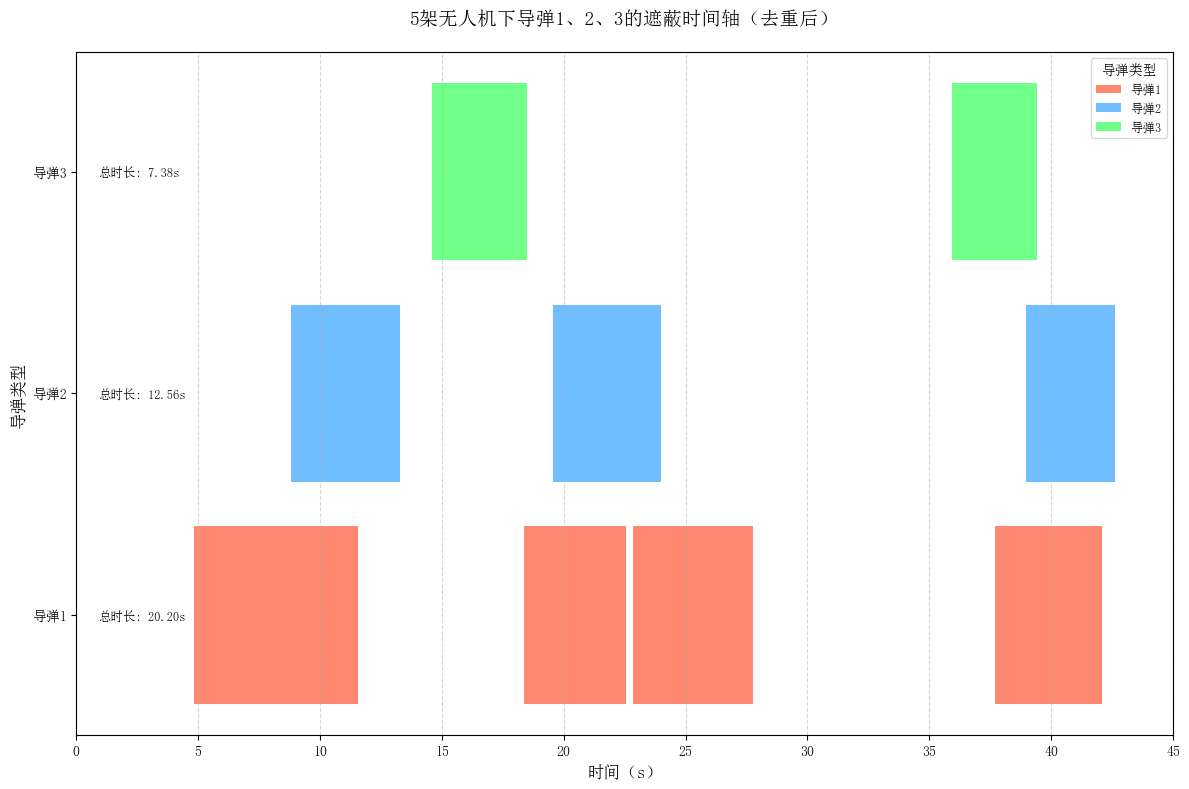

导弹1 去重后总遮蔽时长: 20.20 秒
导弹2 去重后总遮蔽时长: 12.56 秒
导弹3 去重后总遮蔽时长: 7.38 秒


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 整理导弹遮蔽数据（格式：{“导弹X”: {“无人机Y”: [[起始时间, 结束时间], ...]}, ...}）
shield_data = {
    "导弹1": {
        "U1": [[4.83, 11.57]],
        "U2": [[18.38, 22.54]],
        "U3": [[37.71, 42.10]],
        "U4": [[22.84, 27.36]],
        "U5": [[24.35, 27.75]]
    },
    "导弹2": {
        "U1": [],
        "U2": [[8.81, 13.30], [19.71, 22.54]],
        "U3": [[38.96, 42.60]],
        "U4": [[19.55, 23.98]],
        "U5": [[20.22, 23.80]]
    },
    "导弹3": {
        "U1": [],
        "U2": [],
        "U3": [[35.95, 39.41]],
        "U4": [],
        "U5": [[14.59, 18.51]]
    }
}

# 2. 配置视觉样式（颜色、字体）
missile_colors = {
    "导弹1": "#FF5733",  # 红色
    "导弹2": "#33A1FF",  # 蓝色
    "导弹3": "#33FF57"   # 绿色
}
plt.rcParams["font.sans-serif"] = ["SimHei", "WenQuanYi Micro Hei"]  # 中文适配
plt.rcParams["axes.unicode_minus"] = False  # 负号显示适配

# 3. 计算每个导弹的总遮蔽时长（合并重叠/相邻区间，去重）
def merge_intervals(intervals):
    """合并重叠或相邻的区间，返回合并后的区间列表和总时长"""
    if not intervals:
        return [], 0
    # 按起始时间排序
    sorted_intervals = sorted(intervals, key=lambda x: x[0])
    merged = [sorted_intervals[0]]
    for curr_start, curr_end in sorted_intervals[1:]:
        last_start, last_end = merged[-1]
        if curr_start <= last_end:  # 有重叠或相邻，合并
            merged[-1] = [last_start, max(last_end, curr_end)]
        else:  # 无重叠，新增
            merged.append([curr_start, curr_end])
    # 计算总时长
    total_duration = sum(end - start for start, end in merged)
    return merged, total_duration

# 存储各导弹的合并后区间和总时长
missile_merged_intervals = {}
missile_total_duration = {}
for missile in shield_data:
    all_intervals = []
    for drone_intervals in shield_data[missile].values():
        all_intervals.extend(drone_intervals)
    merged, total = merge_intervals(all_intervals)
    missile_merged_intervals[missile] = merged
    missile_total_duration[missile] = total

# 4. 创建图表与轴对象
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("5架无人机下导弹1、2、3的遮蔽时间轴（去重后）", fontsize=14, pad=20)
ax.set_xlabel("时间（s）", fontsize=12)
ax.set_ylabel("导弹类型", fontsize=12)

# 5. 定义纵轴分组
missile_types = ["导弹1", "导弹2", "导弹3"]
y_pos = np.arange(len(missile_types))  # 每个导弹类型的y坐标

# 6. 绘制合并去重后的遮蔽区间（横向条形图）
legend_created = {missile: False for missile in missile_types}
for m_idx, missile in enumerate(missile_types):
    color = missile_colors[missile]
    # 绘制合并后的区间
    for start, end in missile_merged_intervals[missile]:
        duration = end - start
        ax.barh(
            y_pos[m_idx], 
            duration, 
            left=start, 
            color=color, 
            alpha=0.7,  # 透明度便于观察重叠（若有）
            label=missile if not legend_created[missile] else ""
        )
        legend_created[missile] = True
    # 标注总遮蔽时长
    ax.text(
        0.02, y_pos[m_idx], 
        f"总时长: {missile_total_duration[missile]:.2f}s", 
        verticalalignment="center", horizontalalignment="left",
        transform=ax.get_yaxis_transform(),
        fontsize=9,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)  # 白色背景框增强可读性
    )

# 7. 调整轴与图例
ax.set_yticks(y_pos)
ax.set_yticklabels(missile_types, fontsize=10)
ax.set_xlim(0, 45)  # 手动适配时间范围，使区间展示更完整
ax.grid(axis="x", linestyle="--", alpha=0.5)  # x轴网格辅助读时间
ax.legend(title="导弹类型", loc="upper right", fontsize=9)

# 8. 调整布局并显示
plt.tight_layout()
plt.show()

# 打印各导弹去重后的总遮蔽时长
for missile in missile_total_duration:
    print(f"{missile} 去重后总遮蔽时长: {missile_total_duration[missile]:.2f} 秒")

In [5]:
from calc_cover_time import *
result_x =[139.947949, 3.13366040, 0.00656731053, 3.64855823, 15.4525393, 3.60924375, 5.31779428, 7.98774517]
smoke_centers01 = get_smoke_center_multi(f1, result_x[1], result_x[0], result_x[2:5], result_x[5:8], t_list)

get_missile_cover_time_multi_bomb_and_missile(smoke_centers01, missile_trajs, true_target, smoke_R, t_list, debug=True)


导弹1遮蔽情况：
  第1个烟雾球遮蔽时间: 4.14s 区间：    4.83s ~ 8.97s
  第2个烟雾球遮蔽时间: 2.61s 区间：    8.97s ~ 11.57s
  第3个烟雾球遮蔽时间: 0.00s 区间：导弹1总遮蔽区间：
    4.83s ~ 11.57s
导弹1总遮蔽时间: 6.75s
导弹2遮蔽情况：
  第1个烟雾球遮蔽时间: 0.00s 区间：  第2个烟雾球遮蔽时间: 0.00s 区间：  第3个烟雾球遮蔽时间: 0.00s 区间：导弹2总遮蔽区间：
导弹2总遮蔽时间: 0.00s
导弹3遮蔽情况：
  第1个烟雾球遮蔽时间: 0.00s 区间：  第2个烟雾球遮蔽时间: 0.00s 区间：  第3个烟雾球遮蔽时间: 0.00s 区间：导弹3总遮蔽区间：
导弹3总遮蔽时间: 0.00s
所有导弹被遮蔽时间总和: 6.75s


[np.float64(6.748), np.float64(0.0), np.float64(0.0)]